In [1]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
import pandas as pd

nlp = en_core_web_sm.load()

In [2]:
# build keywords for non-personal entities, based on dataset

org_list = ['llc', 'inc', 'ltd', 'limited', 'corporation', 'union', 'bank', 'company', 'organization', 'association', 'trust', 'corp', 'state', 'county', 'political', 'community', 'center']
person_list = ['man', 'woman', 'men', 'women', 'person']
relationship_list = ['husband', 'wife', 'married', 'spouse', 'spouses', 'tenants']
other_person_list = ['his', 'her', 'who', 'aka', 'a/k/a', 'jr', 'sr', 'widow', 'widower']

In [3]:
# Get lines, one by one
# Prepare dataset with simple word list above
# This dataset will be useful to evaluate with any other method. e.g. spacy 

data_columns = ['Number', 'String', 'Type', 'Method']
data         = pd.DataFrame(columns=data_columns)

with open('Names.txt') as input:
    for line in input:
        if any(word in line.lower() for word in org_list):
            line_split = line.split(' ~ ')
            row = pd.Series([line_split[0], line_split[1], 'ORG', 'org_list'],  index=data_columns)
            row.fillna(0, inplace=True)
            data = data.append(row, ignore_index=True) 
        elif any(word in line.lower() for word in person_list):
            line_split = line.split(' ~ ')
            row = pd.Series([line_split[0], line_split[1], 'PERSON', 'person_list'],  index=data_columns)
            row.fillna(0, inplace=True)
            data = data.append(row, ignore_index=True)
        elif any(word in line.lower() for word in relationship_list):
            line_split = line.split(' ~ ')
            row = pd.Series([line_split[0], line_split[1], 'PERSON', 'relationship_list'],  index=data_columns)
            row.fillna(0, inplace=True)
            data = data.append(row, ignore_index=True)
        elif any(word in line.lower() for word in other_person_list):
            line_split = line.split(' ~ ')
            row = pd.Series([line_split[0], line_split[1], 'PERSON', 'other_person_list'],  index=data_columns)
            row.fillna(0, inplace=True)
            data = data.append(row, ignore_index=True)
        else:
            # unclassified - none of the keywords present
            # Check if spacy helps here
            
            line_split = line.split(' ~ ')
            result = nlp(line_split[1])
            
            entity_list = ''
            for X in result.ents:
                entity_list = entity_list + ' ' + X.label_
            
            if 'ORG' in entity_list:
                row = pd.Series([line_split[0], line_split[1], 'ORG', 'SPACY_NER'],  index=data_columns)
                row.fillna(0, inplace=True)
                data = data.append(row, ignore_index=True)
            elif 'PERSON' in entity_list:
                row = pd.Series([line_split[0], line_split[1], 'PERSON', 'SPACY_NER'],  index=data_columns)
                row.fillna(0, inplace=True)
                data = data.append(row, ignore_index=True)
            else:
                row = pd.Series([line_split[0], line_split[1], 'UNCLASSIFIED', 'UNCLASSIFIED'],  index=data_columns)
                row.fillna(0, inplace=True)
                data = data.append(row, ignore_index=True)
        continue

# Analysis
# 
# Spacy results are very poor (<50%)
# This is possibly due to the fact that most ORG names also include person names 
#
# Changing the string to lower affects results a lot - shows inefficiency of the algorithm
# result = nlp(line.lower()) - 1017 14 8 (line_count, person_count, org_count)
# result = nlp(line) - 1017 260 554 (line_count, person_count, org_count)
# 
# Build set of generic words, depicting relationship, gender, and orginaliztion
# Only go to spacy, if none of these words are directly present. 
# 
# Space NER has better accuracy, if we get rid of numbers 
#

#
# Other Ideas
# 1. Surnames will be same for husband and wife - so check for one name coming more than once in a line
#    Exception - companies can also fall in this category. So put org list on top of everything else. 
#
'''
import collections
sentence = 'Richard Christiansen and Cedar Christiansen, who acquired title as Cedar Ousele'
words = sentence.split()
word_counts = collections.Counter(words)
for word, count in sorted(word_counts.items()):
    print('"%s" is repeated %d time%s.' % (word, count, "s" if count > 1 else ""))
'''

'\nimport collections\nsentence = \'Richard Christiansen and Cedar Christiansen, who acquired title as Cedar Ousele\'\nwords = sentence.split()\nword_counts = collections.Counter(words)\nfor word, count in sorted(word_counts.items()):\n    print(\'"%s" is repeated %d time%s.\' % (word, count, "s" if count > 1 else ""))\n'

In [8]:
data

,Number,String,Type,Method
0,2018.2610294,"Bryan Hatfield and Kelly Hatfield, husband and...",PERSON,relationship_list
1,2018.2610299,"Nicholas J Scarpello and Stacy M Scarpello, hu...",PERSON,relationship_list
2,2018.2610318,"JOYCE A MANN AND CHARLES G MANN , WIFE AND HUS...",PERSON,person_list
3,2018.2610370,"ROBERT E. MORAN AND CAROL D. MORAN, HUSBAND AN...",PERSON,relationship_list
4,2018.2610376,"Mark Parish and Karla Parish , husband and wife\n",PERSON,relationship_list
5,2018.2610399,"KENNETH L HILSABECK, ; BONNIE L HILSABECK, ; ...",PERSON,relationship_list
6,2018.2610537,"WILLIAM H MCDEVITT AND DIANE L MCDEVITT, HUSBA...",PERSON,relationship_list
7,2018.2610585,"JAMES L. JONES AND DARLENE JONES, HUSBAND AND ...",PERSON,relationship_list
8,2018.2610593,"FRED RUDACILLE AND YVONNE M RUDACILLE, HUSBAND...",PERSON,relationship_list
9,2018.2610596,"Karen J . Kotl ari k and John J . Kotl ari k, ...",PERSON,relationship_list


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F02C45518>],
      dtype=object)

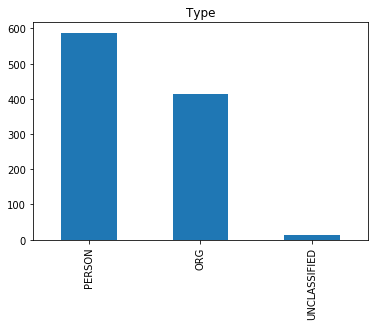

In [9]:
data['Type'].value_counts().plot(kind='bar', subplots=True)

In [6]:
data.replace(r'\\n',' ', regex=True, inplace=True) 
data.to_csv('Names.csv')

In [7]:
#
# Back up for NLTK tokenizer, stemming, and removing stopwords
# These are not used 
# 
'''
from nltk import word_tokenize

from nltk.stem.porter import PorterStemmer
from nltk import PunktSentenceTokenizer
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stemmer = SnowballStemmer('english')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

test = '2018.07.13.44 ~ Mukhtar Singh Toor, a married man as his separate estate'

tokens = word_tokenize(test)
tokens = [w for w in tokens if not w in stop_words]# Remove stopwords.

tokens = stem_tokens(tokens, stemmer)
#print(tokens)
'''

"\nfrom nltk import word_tokenize\n\nfrom nltk.stem.porter import PorterStemmer\nfrom nltk import PunktSentenceTokenizer\nfrom nltk.stem import SnowballStemmer\nfrom nltk.stem.wordnet import WordNetLemmatizer\nfrom nltk.corpus import stopwords\n\nstop_words = stopwords.words('english')\n\nstemmer = SnowballStemmer('english')\n\ndef stem_tokens(tokens, stemmer):\n    stemmed = []\n    for item in tokens:\n        stemmed.append(stemmer.stem(item))\n    return stemmed\n\ntest = '2018.07.13.44 ~ Mukhtar Singh Toor, a married man as his separate estate'\n\ntokens = word_tokenize(test)\ntokens = [w for w in tokens if not w in stop_words]# Remove stopwords.\n\ntokens = stem_tokens(tokens, stemmer)\n#print(tokens)\n"